In [2]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *
from datetime import datetime
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go

ImportError: attempted relative import with no known parent package

In [2]:
def porcentaje(max,min):
    return (1 - (min/max)) * 100

porcentaje(max=264,min=245)

7.196969696969702

### Funciones funcionales

In [21]:
def price_plot(history_df):
    fig = go.Figure([go.Scatter(x=history_df['Date'], y=history_df['Close'],hovertemplate='Precio de cierre: %{y}')])

    fig.update_xaxes(
        rangeslider_visible=True,
        rangeselector=dict(
            buttons=list([
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=10, label="10y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        tickformatstops = [
            dict(dtickrange=[86400000, 604800000], value="%e. %b"),
            dict(dtickrange=[604800000, "M1"], value="%e. %b"),
            dict(dtickrange=["M1", "M12"], value="%b '%y"),
            dict(dtickrange=["M12", None], value="%Y")
        ]
    )

    fig.update_layout(hovermode='x unified')
    fig.update_xaxes(showspikes=True, spikedash = 'solid' ,spikemode  = 'across+toaxis', spikecolor = '#BFBFBF') #, spikecolor ='#E3E3E3'
    fig.update_yaxes(showspikes=True, spikedash = 'solid' ,spikemode  = 'across+toaxis', spikecolor = '#BFBFBF')
    fig.update_traces(hovertemplate='Precio de cierre: %{y}<extra></extra>') 
    fig.show()

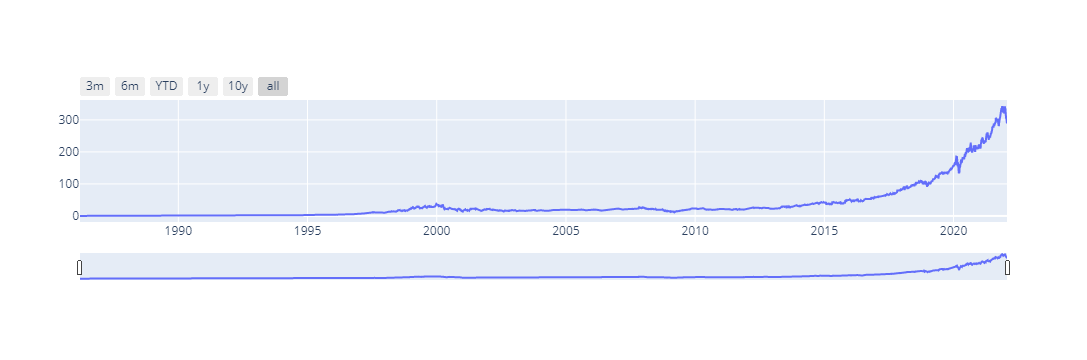

In [22]:
price_plot(df)

##### yfinance es una API de Yahoo Finance. Puedes ver su documentacion aquí --> https://github.com/ranaroussi/yfinance

In [4]:
msft = yf.Ticker("MSFT")

In [5]:
df = msft.history(period='max')
df.reset_index(inplace=True)

In [6]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.055899,0.064119,0.055899,0.061378,1031788800,0.0,0.0
1,1986-03-14,0.061378,0.064667,0.061378,0.063570,308160000,0.0,0.0
2,1986-03-17,0.063570,0.065215,0.063570,0.064667,133171200,0.0,0.0
3,1986-03-18,0.064667,0.065215,0.062474,0.063022,67766400,0.0,0.0
4,1986-03-19,0.063022,0.063570,0.061378,0.061926,47894400,0.0,0.0
...,...,...,...,...,...,...,...,...
9038,2022-01-20,309.070007,311.649994,301.140015,301.600006,35380700,0.0,0.0
9039,2022-01-21,302.690002,304.109985,295.609985,296.029999,57118300,0.0,0.0
9040,2022-01-24,292.200012,297.109985,276.049988,296.369995,86035400,0.0,0.0
9041,2022-01-25,291.519989,294.989990,285.170013,288.489990,69838900,0.0,0.0


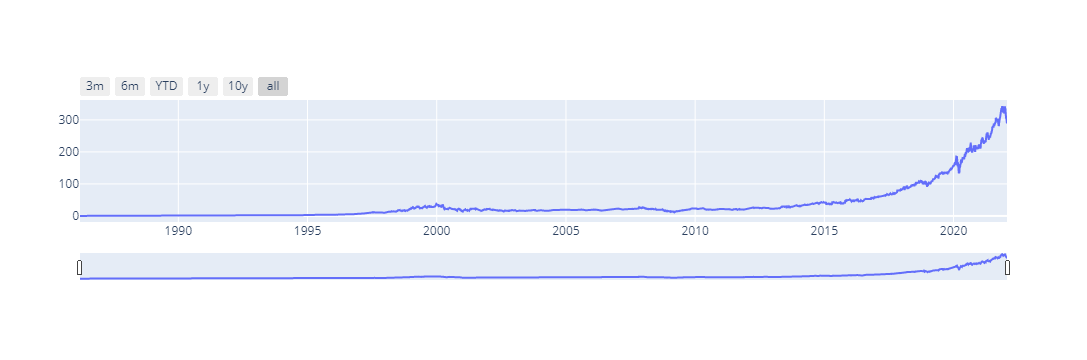

In [14]:
price_plot(df)

In [14]:
msft.info

{'zip': '98052-6399',
 'sector': 'Technology',
 'fullTimeEmployees': 181000,
 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certifica

In [13]:
dic =  msft.info
df = pd.DataFrame([dic])

In [12]:
dict =  msft.info
df = pd.DataFrame.from_dict(dict,orient='index')
df = df.reset_index()
df.columns

Index(['index', 0], dtype='object')

In [ ]:
hist = msft.history(period="max")
plt.close()
plt.plot(hist.index, hist['Close'])
plt.show()

In [4]:
msft.financials

,2021-06-30,2020-06-30,2019-06-30,2018-06-30
Research Development,2.0716e+10,1.9269e+10,1.6876e+10,1.4726e+10
Effect Of Accounting Charges,None,None,None,None
Income Before Tax,7.1102e+10,5.3036e+10,4.3688e+10,3.6474e+10
Minority Interest,None,None,None,None
Net Income,6.1271e+10,4.4281e+10,3.924e+10,1.6571e+10
Selling General Administrative,2.5224e+10,2.4523e+10,2.3098e+10,2.2223e+10
Gross Profit,1.15856e+11,9.6937e+10,8.2933e+10,7.2007e+10
Ebit,6.9916e+10,5.3145e+10,4.2959e+10,3.5058e+10
Operating Income,6.9916e+10,5.3145e+10,4.2959e+10,3.5058e+10
Other Operating Expenses,None,None,None,None


##### Ahora quiero probar con la librería ipywidgets para interactuar con las funciones --> https://ipywidgets.readthedocs.io/en/7.6.2/index.html

In [84]:
# Definicion del SelectionRangeSlider y dos DatePickers. Creacion de funciones que mira sus cambios y los linkea
# El RangeSlider solo se actualiza cuando se cambia al menos el DataPicker de la derecha (No sé como hace para que cambie con solo el de la izquierda)

start_date = datetime(2021, 1, 1)
end_date = datetime.today()

dates = pd.date_range(start_date, end_date, freq='D')

options = {date.strftime(' %d %b %Y '): date for date in dates}

pick_end = widgets.DatePicker(
    description='',
    disabled=False,
    value=end_date
)

pick_start = widgets.DatePicker(
    description='',
    disabled=False,
    value = start_date
)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=(0, len(options) - 1),
    description='Period',
    orientation='horizontal',
    layout=widgets.Layout(width='100%', padding='35px')
)


def update_pick(*args):
    pick_start.value = selection_range_slider.value[0]
    pick_end.value = selection_range_slider.value[1]

def update_slider(*args):
    selection_range_slider.value =  (pick_start.value, pick_end.value)


pick_start.observe(update_slider, 'value')
pick_end.observe(update_slider, 'value')
selection_range_slider.observe(update_pick, 'value')

center_layout = widgets.Layout(display='flex',
                                       align_items='center',
                                       width='100%')

day = widgets.HBox(children=[pick_start, selection_range_slider, pick_end], layout=center_layout)

display(day)

In [94]:
start_date = datetime(2021, 1, 1)
end_date = datetime.today()

dates = pd.date_range(start_date, end_date, freq='D')

options = {date.strftime(' %d %b %Y '): date for date in dates}

pick_end = widgets.DatePicker(
    description='',
    disabled=False,
    value=end_date
)

pick_start = widgets.DatePicker(
    description='',
    disabled=False,
    value = start_date
)

selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=(0, len(options) - 1),
    description='Period',
    orientation='horizontal',
    layout=widgets.Layout(width='100%', padding='35px')
)

def update_pick(*args):
    pick_start.value = selection_range_slider.value[0]
    pick_end.value = selection_range_slider.value[1]
    
def update_slider(*args):
    selection_range_slider.value =  (pick_start.value, pick_end.value)

pick_start.observe(update_slider, 'value')
pick_end.observe(update_slider, 'value')
selection_range_slider.observe(update_pick, 'value')


center_layout = widgets.Layout(display='flex',
                                       align_items='center',
                                       width='100%')

In [101]:
day = widgets.HBox(children=[pick_start, selection_range_slider, pick_end], layout=center_layout)

display(day)

#Creo una función que llame a msft.history con el valor del RangeSlider
def historial(*args):
    df = msft.history(start=selection_range_slider.value[0],end=selection_range_slider.value[1])
    display(df)

#Le digo que la funcion historial mire el valor del RangeSlider y lo actualice
selection_range_slider.observe(historial, 'value')

#Interaccion manual. Sale un botón para lanzar la funcion manualmente
interact(historial, continuous_update=True)

interactive(children=(Output(),), _dom_classes=('widget-interact',))

<function __main__.historial(*args)>

In [4]:
data = yf.download("SPY", start="2017-01-01", end="2017-04-30", group_by = 'ticker')

[*********************100%***********************]  2 of 2 completed


In [6]:
data.head()

SPY                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2017-01-03  225.039993  225.830002  223.880005  225.240005  206.147552   
2017-01-04  225.619995  226.750000  225.610001  226.580002  207.373978   
2017-01-05  226.270004  226.580002  225.479996  226.399994  207.209183   
2017-01-06  226.529999  227.750000  225.899994  227.210007  207.950531   
2017-01-09  226.910004  227.070007  226.419998  226.460007  207.264145   

                           AAPL                                              \
              Volume       Open       High        Low      Close  Adj Close   
Date                                                                          
2017-01-03  91366500  28.950001  29.082500  28.690001  29.037500  27.332472   
2017-01-04  78744400  28.962500  29.127501  28.937500  29.004999  27.301880   
2017-01-05  78379000  28.980000  29.215000  28.952499  29.152500  27.440716   
2017-01-06  71559900  29.195000  29.540001  29.117500  29.477501  27.746632   
2017-01-09  46939700  29.487499  29.857500  29.485001  29.747499  28.000786   

                       
               Volume  
Date                   
2017-01-03  115127600  
2017-01-04   84472400  
2017-01-05   88774400  
2017-01-06  127007600  
2017-01-09  134247600

In [48]:
msft = yf.Ticker("MSFT")

In [51]:
pb = msft.info['priceToBook']
pe = msft.info['regularMarketPrice']/msft.info['trailingEps']
print('Price to Book Ratio is: %.2f' % pb)
print('Price to Earnings Ratio is: %.2f' % pe)

Price to Book Ratio is: 14.64
Price to Earnings Ratio is: 33.15


In [49]:
msft.info['trailingPE']

33.154713

In [52]:
msft.get_stock_earnings_data()

AttributeError: 'Ticker' object has no attribute 'get_stock_earnings_data'

In [57]:
per = 28.9
close = 162.41

In [58]:
eps = per/close
eps

0.1779447078381873

In [59]:
per = 30.64
close = 172.19

In [60]:
eps = per/close
eps

0.1779429699750276

In [9]:
kr = gm.KeyRatiosDownloader()
kr_frames = kr.download(ticker='NA9', region = 'DEU',currency = 'EUR')

ValueError: MorningStar cannot find the ticker symbol you entered or it is INVALID. Please try again.

In [29]:
kr = gm.FinancialsDownloader()
kr_fins = kr.download(ticker='NA9', region = 'DEU',currency = 'EUR')


TypeError: download() got an unexpected keyword argument 'region'

In [13]:
kr_fins
df = pd.DataFrame.from_dict(kr_fins,orient='index')
df = df.reset_index()

In [21]:
print(kr_fins.keys())

dict_keys(['income_statement', 'balance_sheet', 'cash_flow', 'period_range', 'fiscal_year_end', 'currency'])


In [28]:
kr_fins['income_statement']

,parent_index,title,2017,2018,2019,2020,2021,2022
0,0,Revenue,2.292340e+11,2.655950e+11,2.601740e+11,2.745150e+11,3.658170e+11,3.658170e+11
1,1,Cost of revenue,1.410480e+11,1.637560e+11,1.617820e+11,1.695590e+11,2.129810e+11,2.129810e+11
2,2,Gross profit,8.818600e+10,1.018390e+11,9.839200e+10,1.049560e+11,1.528360e+11,1.528360e+11
3,3,Operating expenses,2.684200e+10,3.094100e+10,3.446200e+10,3.866800e+10,4.388700e+10,4.388700e+10
4,3,Research and development,1.158100e+10,1.423600e+10,1.621700e+10,1.875200e+10,2.191400e+10,2.191400e+10
5,3,"Sales, General and administrative",1.526100e+10,1.670500e+10,1.824500e+10,1.991600e+10,2.197300e+10,2.197300e+10
6,3,Total operating expenses,2.684200e+10,3.094100e+10,3.446200e+10,3.866800e+10,4.388700e+10,4.388700e+10
7,7,Operating income,6.134400e+10,7.089800e+10,6.393000e+10,6.628800e+10,1.089490e+11,1.089490e+11
8,8,Interest Expense,2.323000e+09,3.240000e+09,3.576000e+09,2.873000e+09,2.645000e+09,2.645000e+09
9,9,Other income (expense),5.068000e+09,5.245000e+09,5.383000e+09,3.676000e+09,2.903000e+09,2.903000e+09


In [19]:
kr = gm.KeyRatiosDownloader()
kr_frames = kr.download('AAPL')

ValueError: MorningStar cannot find the ticker symbol you entered or it is INVALID. Please try again.

In [ ]:
print(kr_fins[0])

In [ ]:
http://financials.morningstar.com/ajax/exportKR2CSV.html?&callback=?&t=AAPL&region=USA&culture=en_US&cur=USD